# NLP Sentiment Analysis 

In [1]:
#from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CASPER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CASPER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CASPER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
data = pd.read_csv("train.tsv",sep="\t")
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
data.Sentiment.unique()

array([1, 2, 3, 4, 0], dtype=int64)

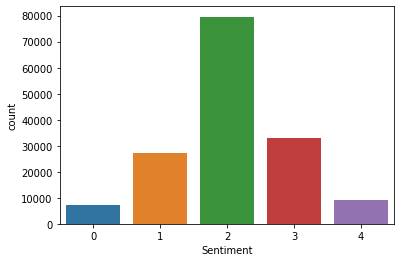

In [5]:
sns.countplot(data.Sentiment)

In [6]:
data["Sentiment"].replace([0,1,3,4], ["negative", "negative", "positive", "positive"], inplace = True)

In [7]:
data.shape

(156060, 4)

In [8]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,negative
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [9]:
data = data[data["Sentiment"]!=2] # There are still "2" numbers and we are writing this code so that they do not exist.

In [10]:
data.shape

(76478, 4)

In [11]:
data.sample(10)

,PhraseId,SentenceId,Phrase,Sentiment
148590,148591,8084,render it anything but laughable,negative
83084,83085,4288,we keep getting torn away from the compelling ...,negative
122065,122066,6542,dedicated artists,positive
120500,120501,6443,Completely awful,negative
53944,53945,2678,to transcend its clever concept,positive
111483,111484,5915,It 's hard to pity the ` plain ' girl who beco...,negative
128485,128486,6912,"I admire the closing scenes of the film , whic...",positive
99589,99590,5224,were all comedy,positive
21475,21476,961,Oscar-winning,positive
34555,34556,1624,The humor and humanity,positive


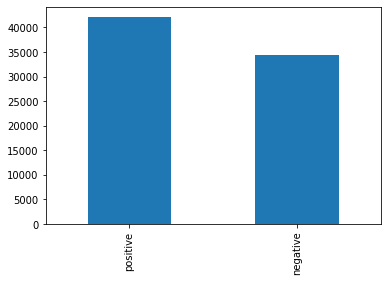

In [12]:
data.Sentiment.value_counts().plot.bar()

In [13]:
# We drop the two columns that are useless for us and make a new data frame.
df = pd.DataFrame()

df["sentences"] = data["Phrase"]
df["label"] = data["Sentiment"]

In [14]:
df.head()

,sentences,label
0,A series of escapades demonstrating the adage ...,negative
21,good for the goose,positive
22,good,positive
33,"the gander , some of which occasionally amuses...",negative
46,amuses,positive


In [15]:
rare_words = pd.Series(' '.join(df['sentences']).split()).value_counts()[-100:]
df['sentences'] = df['sentences'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

In [16]:
# We filter out rare words so that the model doesn't learn much from these words. 
# We chose -100 (start at the end and select the least used) so that the least used ones are selected. More can also be chosen.

In [17]:
# other solution
# pd.Series(" ".join(df["sentences"]).split()).value_counts()[pd.Series(" ".join(df["sentences"]).split()).value_counts() <=2]

In [18]:
rare_words

directive     1
Cineasts      1
McAdams       1
Block         1
spaceship     1
             ..
lay           1
Portugal      1
casualties    1
contrasts     1
printed       1
Length: 100, dtype: int64

In [19]:
df.shape

(76478, 2)

In [20]:
## Text Preprocessing

In [21]:
# **Word Tokenization and lowercase**
df["sentences"]=df["sentences"].apply(lambda x: word_tokenize(x.lower()))
#**Remove Punctuation and numbers and chars like "*" and "#"**
df["sentences"]=df["sentences"].apply(lambda x: list(i for i in x if i.isalpha()))
# **Remove Stopwords**
stop_words = stopwords.words('english')
df["sentences"]=df["sentences"].apply(lambda x: list(i for i in x if i not in stop_words))
# **lemmatization**
lem=WordNetLemmatizer()
df["sentences"]=df["sentences"].apply(lambda x: list(lem.lemmatize(i) for i in x))
# join
df["sentences"]=df["sentences"].apply(lambda x: " ".join(x))

In [22]:
df.head()

,sentences,label
0,series escapade demonstrating adage good goose...,negative
21,good goose,positive
22,good,positive
33,gander occasionally amuses none amount much story,negative
46,amuses,positive


In [23]:
df.iloc[0]

sentences    series escapade demonstrating adage good goose...
label                                                 negative
Name: 0, dtype: object

In [24]:
# Train Test Split

In [25]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df["sentences"],
                                                                   df["label"], 
                                                                    random_state = 101)

In [26]:
X_train.head()

77893                                           inadvertent
145749                                                 much
132511    ravishing costume production design joan wacky...
119837                                                  ate
32396     yet another entry sentimental genre ushered fu...
Name: sentences, dtype: object

In [27]:
encoder = preprocessing.LabelEncoder()

In [28]:
y_train = encoder.fit_transform(y_train)

In [29]:
y_test = encoder.transform(y_test)

In [30]:
y_train[0:5]

array([0, 1, 1, 0, 0])

In [31]:
y_test[0:5]

array([1, 0, 0, 0, 1])

In [32]:
## Count Vectors

In [33]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [34]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [35]:
vectorizer.get_feature_names()[0:5]

['aaa', 'aaliyah', 'aan', 'abagnale', 'abandon']

In [36]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
## TF-IDF

In [38]:
tf_idf_word_vec = TfidfVectorizer()
tf_idf_word_vec.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [39]:
X_train_tfidf = tf_idf_word_vec.transform(X_train)
X_test_tfidf = tf_idf_word_vec.transform(X_test)

In [40]:
tf_idf_word_vec.get_feature_names()[0:5]

['aaa', 'aaliyah', 'aan', 'abagnale', 'abandon']

In [41]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
a = pd.DataFrame(X_train_tfidf.toarray())

In [43]:
pd.set_option('display.max_columns', 1000)

In [44]:
a.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,...,12262,12263,12264,12265,12266,12267,12268,12269,12270,12271,12272,12273,12274,12275,12276,12277,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287,12288,12289,12290,12291,12292,12293,12294,12295,12296,12297,12298,12299,12300,12301,12302,12303,12304,12305,12306,12307,12308,12309,12310,12311,12312,12313,12314,12315,12316,12317,12318,12319,12320,12321,12322,12323,12324,12325,12326,12327,12328,12329,12330,12331,12332,12333,12334,12335,12336,12337,12338,12339,12340,12341,12342,12343,12344,12345,12346,12347,12348,12349,12350,12351,12352,12353,12354,12355,12356,12357,12358,12359,12360,12361,12362,12363,12364,12365,12366,12367,12368,12369,12370,12371,12372,12373,12374,12375,12376,12377,12378,12379,12380,12381,12382,12383,12384,12385,12386,12387,12388,12389,12390,12391,12392,12393,12394,12395,12396,12397,12398,12399,12400,12401,12402,12403,12404,12405,12406,12407,12408,12409,12410,12411,12412,12413,12414,12415,12416,12417,12418,12419,12420,12421,12422,12423,12424,12425,12426,12427,12428,12429,12430,12431,12432,12433,12434,12435,12436,12437,12438,12439,12440,12441,12442,12443,12444,12445,12446,12447,12448,12449,12450,12451,12452,12453,12454,12455,12456,12457,12458,12459,12460,12461,12462,12463,12464,12465,12466,12467,12468,12469,12470,12471,12472,12473,12474,12475,12476,12477,12478,12479,12480,12481,12482,12483,12484,12485,12486,12487,12488,12489,12490,12491,12492,12493,12494,12495,12496,12497,12498,12499,12500,12501,12502,12503,12504,12505,12506,12507,12508,12509,12510,12511,12512,12513,12514,12515,12516,12517,12518,12519,12520,12521,12522,12523,12524,12525,12526,12527,12528,12529,12530,12531,12532,12533,12534,12535,12536,12537,12538,12539,12540,12541,12542,12543,12544,12545,12546,12547,12548,12549,12550,12551,12552,12553,12554,12555,12556,12557,12558,12559,12560,12561,12562,12563,12564,12565,12566,12567,12568,12569,12570,12571,12572,12573,12574,12575,12576,12577,12578,12579,12580,12581,12582,12583,12584,12585,12586,12587,12588,12589,12590,12591,12592,12593,12594,12595,12596,12597,12598,12599,12600,12601,12602,12603,12604,12605,12606,12607,12608,12609,12610,12611,12612

In [45]:
## Classification Models

In [46]:
### Logistic Regression

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)

# Make predictions
y_pred = log_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test, y_pred))

[[7108 1493]
 [1096 9423]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      8601
           1       0.86      0.90      0.88     10519

    accuracy                           0.86     19120
   macro avg       0.86      0.86      0.86     19120
weighted avg       0.86      0.86      0.86     19120



In [49]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)

log_accuracy_count = model_selection.cross_val_score(log_classifier, 
                                           X_test_count, 
                                           y_test, 
                                           cv = 10).mean()
print("Count Vectors Accuracy:", log_accuracy_count)

Count Vectors Accuracy: 0.8214435146443515


In [50]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_tfidf, y_train)

log_accuracy_tf = model_selection.cross_val_score(log_classifier, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()

print("TF-IDF Accuracy:", log_accuracy_tf)

TF-IDF Accuracy: 0.8185669456066945


In [51]:
## XGBoost Classifier

In [52]:
from xgboost import XGBClassifier

In [53]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test, y_pred))

[16:57:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[4179 4422]
 [ 720 9799]]
              precision    recall  f1-score   support

           0       0.85      0.49      0.62      8601
           1       0.69      0.93      0.79     10519

    accuracy                           0.73     19120
   macro avg       0.77      0.71      0.71     19120
weighted avg       0.76      0.73      0.71     19120



In [54]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)

xgb_accuracy_count = model_selection.cross_val_score(xgb_classifier, 
                                           X_test_count, 
                                           y_test, 
                                           cv = 10).mean()
print("Count Vectors Accuracy:", xgb_accuracy_count)

[16:57:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:57:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:57:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:57:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [55]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_tfidf , y_train)

xgb_accuracy_tf = model_selection.cross_val_score(xgb_classifier, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()

print("TF-IDF Accuracy:", xgb_accuracy_tf)

[16:58:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:58:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:58:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:59:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [57]:
## Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_count , y_train)

# Make predictions
y_pred = dsc_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test, y_pred))

[[7195 1406]
 [1056 9463]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      8601
           1       0.87      0.90      0.88     10519

    accuracy                           0.87     19120
   macro avg       0.87      0.87      0.87     19120
weighted avg       0.87      0.87      0.87     19120



In [60]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_count , y_train)

dsc_accuracy_count = model_selection.cross_val_score(dsc_classifier, 
                                           X_test_count, 
                                           y_test, 
                                           cv = 10).mean()
print("Count Vectors Accuracy:", dsc_accuracy_count)

Count Vectors Accuracy: 0.7790794979079498


In [61]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_tfidf , y_train)

dsc_accuracy_tf = model_selection.cross_val_score(dsc_classifier, 
                                           X_test_tfidf, 
                                           y_test, 
                                           cv = 10).mean()

print("TF-IDF Accuracy:", dsc_accuracy_tf)

TF-IDF Accuracy: 0.773744769874477


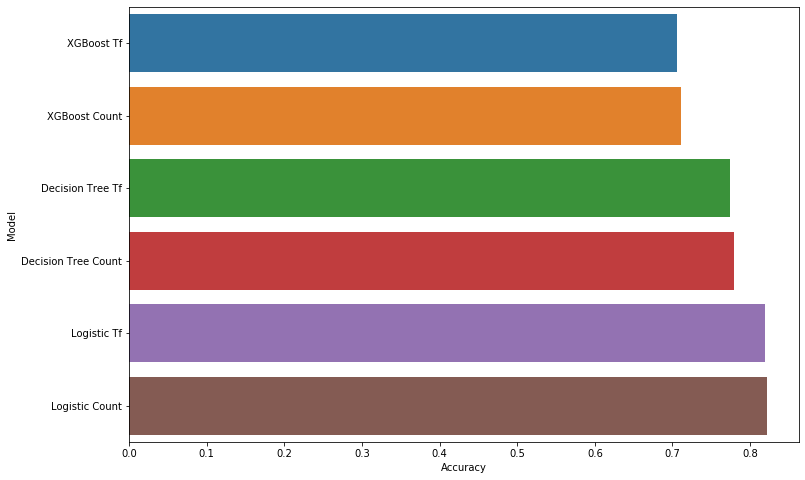

In [62]:
compare = pd.DataFrame({"Model": ["Logistic Count", "Logistic Tf", "XGBoost Count", "XGBoost Tf", "Decision Tree Count","Decision Tree Tf"],
                        "Accuracy": [log_accuracy_count, log_accuracy_tf, xgb_accuracy_count, xgb_accuracy_tf, dsc_accuracy_count,dsc_accuracy_tf]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(12,8))
ax = sns.barplot(x="Accuracy", y="Model", data=compare)